[55.60454744  3.97916907]
[0.78066288 0.05756534]


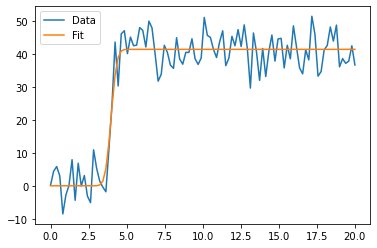

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.optimize import curve_fit


def generate_equation(x, w, a, c):
    '''
    w: fwhm of the gaussian
    a: amplitude of the heaviside
    c: step position of the heaviside
    '''
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * erfc(2 * np.sqrt(np.log(2)) * (c - x) / w)

def fit_equation(x, a, c):
    '''
    w: fwhm of the gaussian
    a: amplitude of the heaviside
    c: step position of the heaviside
    '''
    w = 0.7
    return 0.25 * a * w * np.sqrt(np.pi / np.log(2)) * erfc(2 * np.sqrt(np.log(2)) * (c - x) / w)

# Generate some example data
fitting_range = 20  # nm
x_data = np.linspace(0, fitting_range, 100)
y_true = generate_equation(x_data, 0.4, 100, 4) + np.random.normal(0, 5, len(x_data))

# Fit the data to the model
p0 = [100, 1.7]  # Initial guess for parameters
params, covariance = curve_fit(fit_equation, x_data, y_true, p0=p0)
uncertainties = np.sqrt(np.diag(covariance))

print(params)
print(uncertainties)

# Plot the original data and the fitted function
plt.plot(x_data, y_true, label='Data')
plt.plot(x_data, fit_equation(x_data, *params), label='Fit')
plt.legend()
plt.show()
